<a href="https://colab.research.google.com/github/tcbic/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
#Load the data.

data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

In [0]:
#Make a dataframe.

import pandas as pd

df = pd.read_csv(data_url)

In [132]:
#Take an initial look at the dataframe.

df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [133]:
#UCI website says we should have 306 observations(rows).

#What do we have?

#Hmmm, it looks like we're missing a header row.

df.shape

(305, 4)

In [134]:
#Do we have any missing values?

#We've verified that we don't have any missing values.

df.isnull().sum()

30     0
64     0
1      0
1.1    0
dtype: int64

In [0]:
#Add feature names to our dataframe.

feature_names = ['age_at_time_of_operation', 'patient_year_of_operation', 'num_pos_axillary_nodes_detected', 'survival_status']

df = pd.read_csv(data_url, names=feature_names)

In [136]:
#Validate that feature names were added.

df.head()

,age_at_time_of_operation,patient_year_of_operation,num_pos_axillary_nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [137]:
#Change the survival status column so that it reflects 1 for surviving > 5 years and 0 for not.

import numpy as np

df['survival_status'] = df['survival_status'].replace(2,0) 

df['survival_status']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      0
8      0
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     0
25     1
26     1
27     1
28     1
29     1
      ..
276    1
277    1
278    1
279    1
280    1
281    0
282    1
283    1
284    1
285    0
286    0
287    1
288    1
289    1
290    1
291    1
292    1
293    0
294    1
295    1
296    1
297    1
298    1
299    0
300    1
301    1
302    1
303    1
304    0
305    0
Name: survival_status, Length: 306, dtype: int64

In [139]:
#Verify that updated data feature is now reflected in the dataframe.

df.head(20)

,age_at_time_of_operation,patient_year_of_operation,num_pos_axillary_nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


In [141]:
#Added another column to the dataframe to reflect the boolean value for the survival_status column.

df['survival_status_as_bool'] = df['survival_status'].astype(bool)

df['survival_status_as_bool']

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7      False
8      False
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24     False
25      True
26      True
27      True
28      True
29      True
       ...  
276     True
277     True
278     True
279     True
280     True
281    False
282     True
283     True
284     True
285    False
286    False
287     True
288     True
289     True
290     True
291     True
292     True
293    False
294     True
295     True
296     True
297     True
298     True
299    False
300     True
301     True
302     True
303     True
304    False
305    False
Name: survival_status_as_bool, Length: 306, dtype: bool

In [142]:
df.head()

,age_at_time_of_operation,patient_year_of_operation,num_pos_axillary_nodes_detected,survival_status,survival_status_as_bool
0,30,64,1,1,True
1,30,62,3,1,True
2,30,65,0,1,True
3,31,59,2,1,True
4,31,65,4,1,True


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
#Questions I would ask:

#1) How might age at the time of operation affect survival status?
#2) Did the year the patient have their operation affect their survival status?

In [0]:
#Crosstable 1

age_bins = pd.cut(df['age_at_time_of_operation'], 5)

ct1 = pd.crosstab(df['survival_status_as_bool'], age_bins)

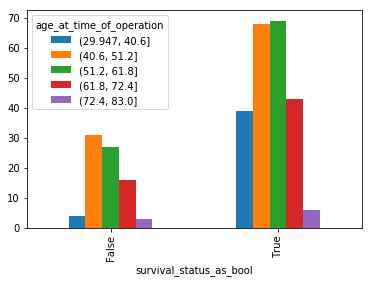

In [168]:
#Bar chart for Crosstable 1

ct1.plot.bar();

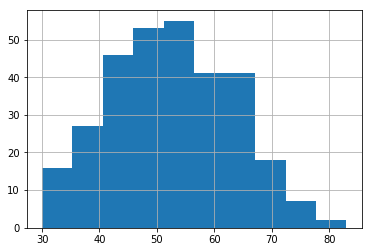

In [179]:
#Displays frequency of the age of patients at the time of the operation.

df.age_at_time_of_operation.hist()

In [0]:
#Crosstable 2

year_bins = pd.cut(df['patient_year_of_operation'], 3)

ct2 = pd.crosstab(df['survival_status_as_bool'], year_bins)

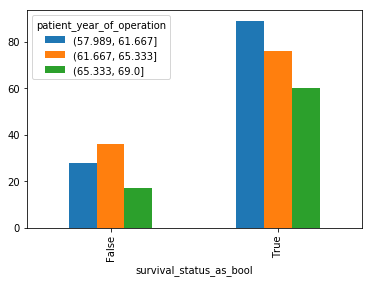

In [164]:
#Bar chart for Crosstable 2
ct2.plot.bar();

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

To begin, I observed that for a particular age there was a greater frequency of having the operation (middle age; between 50-55 years old). As the age of the patient increases at the time of operation, we observe less frequency. The year in which the patient had the operation seems to show that the likelihood of a patient survivingl for more than 5 years declines as the year the operation is performed increases. (This seems counter to my inuition..One might think that time would enable improved practice and technology. So theoretically, the idea of progress with time doesn't seem to hold here.)

